Imports

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

Load in the data

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


Number of classes

In [4]:
k = len(set(y_train))
print("Number of classes:", k)

Number of classes: 10


Build the model using functional API

In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

Compile and fit the model

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 7ms/step - loss: 1.5750 - accuracy: 0.4257 - val_loss: 1.2841 - val_accuracy: 0.5397
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2810 - accuracy: 0.5402 - val_loss: 1.1366 - val_accuracy: 0.5911
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1546 - accuracy: 0.5866 - val_loss: 1.0695 - val_accuracy: 0.6250
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0585 - accuracy: 0.6221 - val_loss: 1.0210 - val_accuracy: 0.6342
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9827 - accuracy: 0.6497 - val_loss: 0.9379 - val_accuracy: 0.6739
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9142 - accuracy: 0.6740 - val_loss: 0.8889 - val_accuracy: 0.6901
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8567 - accuracy: 0.6979 - val_loss: 0.8574 - val_accuracy

Plot loss per iteration

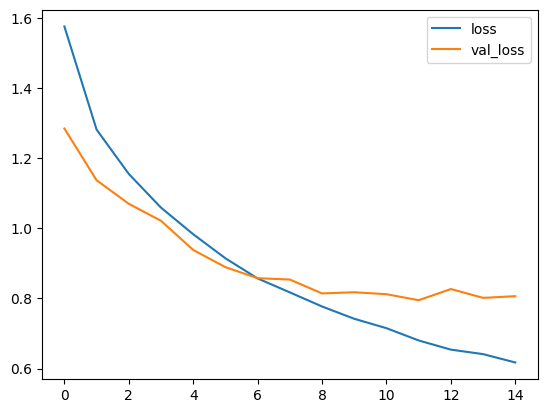

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

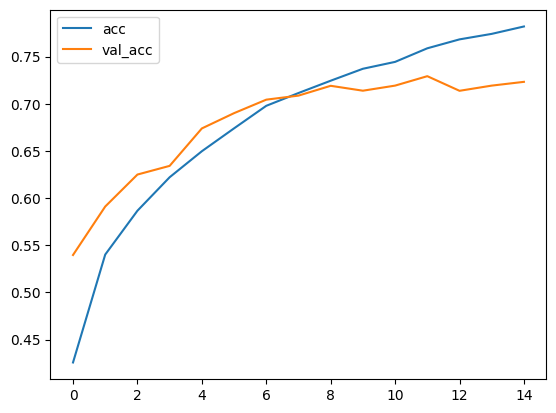

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

Plot the confusion matrix

313/313 [==============================] - 2s 4ms/step
Confusion matrix, without normalization
[[693  27  29  16  15   6  12  13 137  52]
 [ 10 859   1   4   2   7   7   0  23  87]
 [ 68  12 551  69 105  76  58  32  20   9]
 [ 17  14  48 523  63 194  70  37  12  22]
 [ 14   3  57  61 704  42  36  68  12   3]
 [ 10   5  29 160  57 651  22  47   9  10]
 [  3   9  25  55  49  27 803   9  11   9]
 [  9   4  18  39  55  55  10 790   4  16]
 [ 30  45   7  10  13   8   2   2 858  25]
 [ 17 100   6  12   4  11   5  11  33 801]]


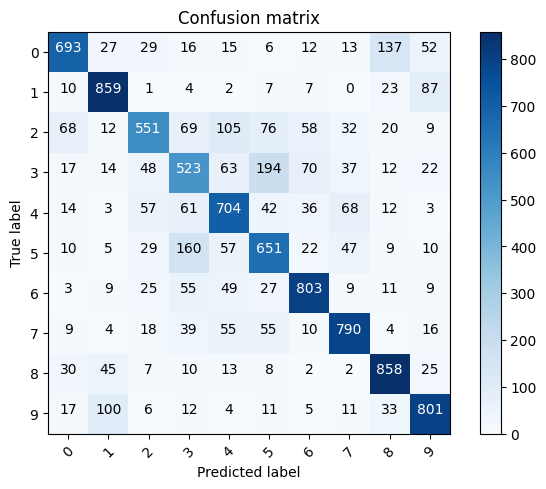

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Label mapping

In [23]:
labels="""airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split('\n')
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Show some misclassified examples

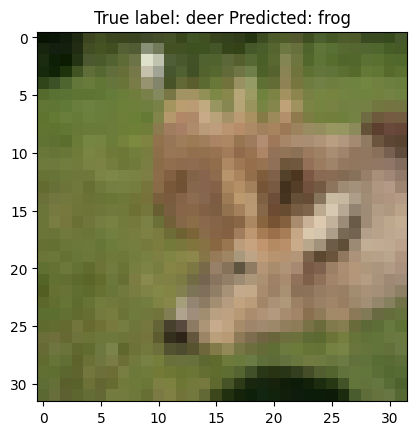

In [27]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}");

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1180